## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Set filenames

In [2]:
train_locations=pd.read_csv("Data/train_locations.csv")
train_customers=pd.read_csv("Data/train_customers.csv")

## Remove customer duplicate info

In [3]:
train_customers.head() #Customer id details

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23
1,ZGFSYCZ,Male,NaN,1,1,EN,2018-02-09 12:04:42,2018-02-09 12:04:41
2,S2ALZFL,Male,NaN,0,1,EN,2018-03-14 18:31:43,2018-03-14 18:31:42
3,952DBJQ,Male,NaN,1,1,EN,2018-03-15 19:47:07,2018-03-15 19:47:07
4,1IX6FXS,Male,NaN,1,1,EN,2018-03-15 19:57:01,2018-03-15 19:57:01


In [4]:
len(train_customers)

34674

In [5]:
train_customers['akeed_customer_id'].value_counts() #There are duplicate values, let's

0FOCFVI    17
H0GVNAK    16
XFQVCSZ     9
QT5BMDP     7
U0SUJYS     7
           ..
QP7QQF6     1
I3L8LWN     1
UZ79GV9     1
0W261FE     1
4C9ROFP     1
Name: akeed_customer_id, Length: 34523, dtype: int64

In [6]:
# Sort customer file on customer ID and Verified columns in ascending order. Remove duplicates and keep last record that is verified.
train_customers =train_customers.sort_values(by=['akeed_customer_id', 'verified'])
train_customers.drop_duplicates(subset='akeed_customer_id',keep='last',inplace=True)

In [7]:
print(train_customers['akeed_customer_id'].nunique())
print(len(train_customers))

34523
34523


## Customer locations  info

In [8]:
train_locations.head() #details on customer location

,customer_id,location_number,location_type,latitude,longitude
0,02SFNJH,0,NaN,1.682392,-78.789737
1,02SFNJH,1,NaN,1.679137,0.766823
2,02SFNJH,2,NaN,-0.498648,0.661241
3,RU43CXC,0,Home,0.100853,0.438165
4,BDFBPRD,0,NaN,2.523125,0.733464


In [9]:
print(train_locations['customer_id'].value_counts())

4Y0K8NQ    30
NETYQ1C    26
5EP9F62    20
4UZKXW2    19
YYKZN0F    19
           ..
3SW7JAL     1
Z1KKOUK     1
T2SFZ1D     1
FW29RIH     1
OPN9CXL     1
Name: customer_id, Length: 35400, dtype: int64


In [10]:
print(train_locations['location_number'].value_counts())

0     35400
1     13798
2      5488
3      2519
4      1153
5       504
6       246
7       128
8        76
9        52
10       34
11       21
12       15
13       13
14       13
15        8
16        6
17        5
18        5
19        3
20        2
21        2
22        2
23        2
24        2
25        2
28        1
26        1
27        1
29        1
Name: location_number, dtype: int64


In [11]:
len(np.unique((train_locations[['customer_id','location_number']].values).astype(str),axis=0))
#The customer id and loc number together have unique values of 59503, the same as the number of rows 

59503

In [12]:
print(train_locations['customer_id'].nunique())
print(len(train_locations))

35400
59503


## Merge customer and locations

In [13]:
cust_loc=pd.merge(train_customers,train_locations,how="right",left_on='akeed_customer_id',right_on='customer_id')
del cust_loc['akeed_customer_id']

In [14]:
cust_loc.head()

,gender,dob,status,verified,language,created_at,updated_at,customer_id,location_number,location_type,latitude,longitude
0,Male,NaN,1.0,1.0,EN,2018-11-14 13:50:26,2018-11-14 13:50:25,000THBA,0,NaN,-0.020250,0.167026
1,Male,1973.0,1.0,1.0,EN,2019-03-29 23:16:34,2019-03-29 23:16:34,001XN9X,0,Home,0.190209,-78.613388
2,NaN,NaN,1.0,1.0,NaN,2020-01-30 22:05:00,2020-01-30 22:05:18,001ZNTK,0,Other,14.075755,-1.613278
3,NaN,NaN,1.0,1.0,EN,2019-06-14 02:28:19,2019-10-01 18:46:07,002510Y,0,Home,0.056822,-78.597624
4,male,NaN,1.0,1.0,NaN,2019-12-30 11:44:14,2019-12-30 11:45:06,005ECL6,0,Work,-0.315825,0.158935


## Renaming some customer columns for clarity

In [15]:
cust_loc=cust_loc.rename(columns={'latitude':'cust_latitude','longitude':'cust_longitude',
                                  'location_type':'cust_location_type','location_number':'cust_location_number',
                                  'created_at':'cust_created_at','updated_at':'cust_updated_at','status':'cust_status',
                                  'verified':'cust_verified'})

In [16]:
cust_loc.columns.values

array(['gender', 'dob', 'cust_status', 'cust_verified', 'language',
       'cust_created_at', 'cust_updated_at', 'customer_id',
       'cust_location_number', 'cust_location_type', 'cust_latitude',
       'cust_longitude'], dtype=object)

## Lat and long

In [17]:
print(type(cust_loc['cust_latitude'][0]))
print(cust_loc[['cust_latitude', 'cust_longitude']].isnull().sum())
cust_loc[['cust_latitude', 'cust_longitude']]=cust_loc[['cust_latitude', 'cust_longitude']].fillna(0)
print(cust_loc[['cust_latitude', 'cust_longitude']].isnull().sum())
cust_loc[[ 'cust_latitude', 'cust_longitude']]

<class 'numpy.float64'>
cust_latitude     6
cust_longitude    6
dtype: int64
cust_latitude     0
cust_longitude    0
dtype: int64


,cust_latitude,cust_longitude
0,-0.020250,0.167026
1,0.190209,-78.613388
2,14.075755,-1.613278
3,0.056822,-78.597624
4,-0.315825,0.158935
...,...,...
59498,0.212891,0.520747
59499,-0.575511,0.028316
59500,1.992047,0.699620
59501,2.274840,0.731213


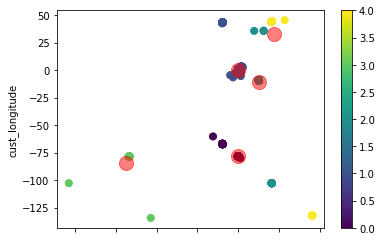

In [18]:
#cluster lat and long
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(cust_loc[[ 'cust_latitude', 'cust_longitude']])
cust_loc['loc_cluster_label'] = kmeans.fit_predict(cust_loc[[ 'cust_latitude', 'cust_longitude']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(cust_loc[[ 'cust_latitude', 'cust_longitude']])
# Full_data['cluster_label'].value_counts()
cust_loc.plot.scatter(x = 'cust_latitude', y = 'cust_longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [19]:
cust_loc['loc_cluster_label'].value_counts()

1    39244
0    19112
2     1023
4      111
3       13
Name: loc_cluster_label, dtype: int64

## Gender

In [20]:
cust_loc['gender'].unique()

array(['Male', nan, 'male', 'Female', 'Female  ', '?????', 'Male  ', '  ',
       'Female   ', 'Female    ', 'Female '], dtype=object)

In [21]:
def gender(title):
    if title=='Male' or title=='Male  ' or title=='male' :
        return 'male'
    elif title=='Female'  or title=='Female  '  or title=='Female   ' or title=='Female    ' or title=='Female ':
        return 'female'
    else:
        return np.nan

In [22]:
cust_loc['gender']=cust_loc['gender'].apply(gender)

In [23]:
cust_loc['gender'].unique()

array(['male', nan, 'female'], dtype=object)

## Created at

In [24]:
cust_loc['cust_created_at']

0        2018-11-14 13:50:26
1        2019-03-29 23:16:34
2        2020-01-30 22:05:00
3        2019-06-14 02:28:19
4        2019-12-30 11:44:14
                ...         
59498                    NaN
59499                    NaN
59500                    NaN
59501                    NaN
59502                    NaN
Name: cust_created_at, Length: 59503, dtype: object

In [25]:
cust_loc['cust_created_at'].isnull().sum()

1479

In [26]:
cust_loc['Date_cust_created_at'] = cust_loc['cust_created_at'].str.split(' ').str[0]


In [27]:
cust_loc['Date_cust_created_at']

0        2018-11-14
1        2019-03-29
2        2020-01-30
3        2019-06-14
4        2019-12-30
            ...    
59498           NaN
59499           NaN
59500           NaN
59501           NaN
59502           NaN
Name: Date_cust_created_at, Length: 59503, dtype: object

In [28]:
cust_loc['Date_cust_created_at'] = pd.to_datetime(cust_loc['Date_cust_created_at'], format='%Y-%m-%d')

In [29]:
print(type(cust_loc['Date_cust_created_at'][0]))
cust_loc['Date_cust_created_at']

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


0       2018-11-14
1       2019-03-29
2       2020-01-30
3       2019-06-14
4       2019-12-30
           ...    
59498          NaT
59499          NaT
59500          NaT
59501          NaT
59502          NaT
Name: Date_cust_created_at, Length: 59503, dtype: datetime64[ns]

In [30]:
Curr_date='2020-07-01'
Curr_date=pd.to_datetime(Curr_date,format='%Y-%m-%d')
print(Curr_date)
print(type(Curr_date))
print(abs(Curr_date-cust_loc['Date_cust_created_at'][0]).days)

2020-07-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
595


In [31]:
def days_between(day):
    return (Curr_date-day).days

In [32]:
cust_loc['Cust_created_days']=cust_loc['Date_cust_created_at'].apply(days_between)

In [33]:
cust_loc['Cust_created_days'].isnull().sum()

1479

In [34]:
cust_loc.drop(['language','cust_longitude','cust_latitude','cust_updated_at','Date_cust_created_at','cust_created_at'],axis=1,inplace=True)

## One hot encoding

In [35]:
TrainDummy = pd.get_dummies(cust_loc['cust_location_type'], prefix = 'cust_location_type') 
genderDummy=pd.get_dummies(cust_loc['gender'],prefix='gender')
locationDummy=pd.get_dummies(cust_loc['loc_cluster_label'],prefix='cust_lan_long')
del cust_loc['cust_location_type']
del cust_loc['gender']
del cust_loc['loc_cluster_label']
customer = pd.concat([cust_loc,TrainDummy,genderDummy,locationDummy], axis=1)
customer.head()

,dob,cust_status,cust_verified,customer_id,cust_location_number,Cust_created_days,cust_location_type_Home,cust_location_type_Other,cust_location_type_Work,gender_female,gender_male,cust_lan_long_0,cust_lan_long_1,cust_lan_long_2,cust_lan_long_3,cust_lan_long_4
0,NaN,1.0,1.0,000THBA,0,595.0,0,0,0,0,1,0,1,0,0,0
1,1973.0,1.0,1.0,001XN9X,0,460.0,1,0,0,0,1,1,0,0,0,0
2,NaN,1.0,1.0,001ZNTK,0,153.0,0,1,0,0,0,0,1,0,0,0
3,NaN,1.0,1.0,002510Y,0,383.0,1,0,0,0,0,1,0,0,0,0
4,NaN,1.0,1.0,005ECL6,0,184.0,0,0,1,0,1,0,1,0,0,0


In [36]:
#convert to csv file
customer.to_csv("customers_p1.csv",index=False)